In [40]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3")
env.reset()

# Explore the environment
print("Action Space: ", env.action_space)
print("State Space: ", env.observation_space)

Action Space:  Discrete(6)
State Space:  Discrete(500)


In [41]:
def value_iteration(env, gamma=0.9, theta=1e-8):
    V = np.zeros(env.observation_space.n)
    delta_list = []
    iteration = 0

    while True:
        delta = 0
        for s in range(env.observation_space.n):
            A = np.zeros(env.action_space.n)
            for a in range(env.action_space.n):
                for prob, next_state, reward, done in env.P[s][a]:
                    A[a] += prob * (reward + gamma * V[next_state])
            best_action_value = np.max(A)
            delta = max(delta, np.abs(best_action_value - V[s]))
            V[s] = best_action_value
        delta_list.append(delta)
        
        if delta < theta:
            print(f"Value Iteration converged at iteration {iteration}")
            break

        iteration += 1

    policy = np.zeros(env.observation_space.n, dtype=int)
    for s in range(env.observation_space.n):
        best_action = np.argmax([sum(prob * (reward + gamma * V[next_state])
                                    for prob, next_state, reward, done in env.P[s][a])
                                 for a in range(env.action_space.n)])
        policy[s] = best_action

    return policy, V, delta_list


In [42]:
def policy_iteration(env, gamma=0.9, theta=1e-8):
    policy = np.random.choice(env.action_space.n, size=(env.observation_space.n)) 
    V = np.zeros(env.observation_space.n)
    iteration = 0

    while True:
        # Policy Evaluation
        while True:
            delta = 0
            for s in range(env.observation_space.n):
                v = V[s]
                V[s] = sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][policy[s]]])
                delta = max(delta, abs(v - V[s]))
            if delta < theta:
                break

        # Policy Improvement
        policy_stable = True
        for s in range(env.observation_space.n):
            old_action = policy[s]
            policy[s] = np.argmax([sum(p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a])
                                   for a in range(env.action_space.n)])
            if old_action != policy[s]:
                policy_stable = False

        if policy_stable:
            print(f"Policy Iteration converged at iteration {iteration}")
            break

        iteration += 1

    return policy, V

In [43]:
def visualize_policy(env, policy):
    state_info = env.reset()
    # Adapt to the format of state_info
    state = state_info[0] if isinstance(state_info, tuple) else state_info
    env.render()
    done = False
    while not done:
        action = policy[state]
        step_result = env.step(action)

        # Unpack step_result based on its structure
        if isinstance(step_result, tuple):
            state_info = step_result[0]
            reward = step_result[1]
            done = step_result[2]
            # Extract only the state index
            state = state_info[0] if isinstance(state_info, tuple) else state_info
        else:
            raise ValueError("Unexpected return format from env.step()")
        
        env.render()
        if done:
            break

Value Iteration converged at iteration 106


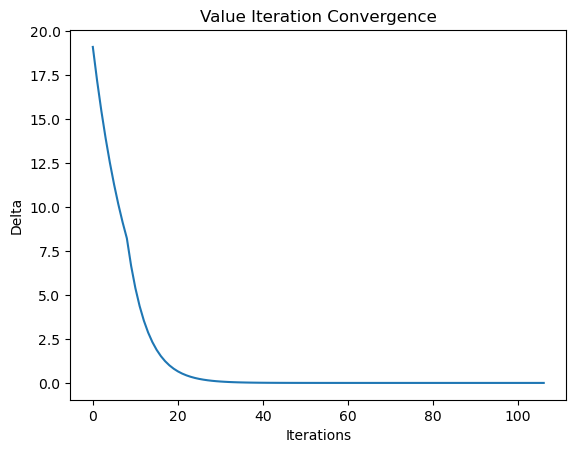

In [44]:
policy_vi, V_vi, delta_list_vi = value_iteration(env)

plt.plot(delta_list_vi)
plt.xlabel('Iterations')
plt.ylabel('Delta')
plt.title('Value Iteration Convergence')
plt.show()

In [45]:
# Run Value Iteration
policy_vi, V_vi, delta_list_vi = value_iteration(env)
visualize_policy(env, policy_vi)

# Run Policy Iteration
policy_pi, V_pi = policy_iteration(env)
visualize_policy(env, policy_pi)

Value Iteration converged at iteration 106
Policy Iteration converged at iteration 17


In [47]:
def run_value_iteration_multiple_times(env, num_runs=10):
    policies = []
    value_functions = []
    iterations_list = []

    for _ in range(num_runs):
        policy, V, delta_list = value_iteration(env)
        policies.append(policy)
        value_functions.append(V)
        iterations_list.append(len(delta_list))

    return policies, value_functions, iterations_list

policies_vi, value_functions_vi, iterations_list_vi = run_value_iteration_multiple_times(env, num_runs=10)

Value Iteration converged at iteration 106
Value Iteration converged at iteration 106
Value Iteration converged at iteration 106
Value Iteration converged at iteration 106
Value Iteration converged at iteration 106
Value Iteration converged at iteration 106
Value Iteration converged at iteration 106
Value Iteration converged at iteration 106
Value Iteration converged at iteration 106
Value Iteration converged at iteration 106


In [48]:
def print_policy(policy, env):
    for state in range(env.observation_space.n):
        print(f"State: {state}, Action: {policy[state]}")

# Example for one run
print_policy(policies_vi[0], env)

State: 0, Action: 4
State: 1, Action: 4
State: 2, Action: 4
State: 3, Action: 4
State: 4, Action: 0
State: 5, Action: 0
State: 6, Action: 0
State: 7, Action: 0
State: 8, Action: 0
State: 9, Action: 0
State: 10, Action: 0
State: 11, Action: 0
State: 12, Action: 0
State: 13, Action: 0
State: 14, Action: 0
State: 15, Action: 0
State: 16, Action: 5
State: 17, Action: 0
State: 18, Action: 0
State: 19, Action: 0
State: 20, Action: 3
State: 21, Action: 3
State: 22, Action: 3
State: 23, Action: 3
State: 24, Action: 0
State: 25, Action: 0
State: 26, Action: 0
State: 27, Action: 0
State: 28, Action: 0
State: 29, Action: 0
State: 30, Action: 0
State: 31, Action: 0
State: 32, Action: 0
State: 33, Action: 0
State: 34, Action: 0
State: 35, Action: 0
State: 36, Action: 3
State: 37, Action: 0
State: 38, Action: 0
State: 39, Action: 0
State: 40, Action: 0
State: 41, Action: 0
State: 42, Action: 0
State: 43, Action: 0
State: 44, Action: 2
State: 45, Action: 2
State: 46, Action: 2
State: 47, Action: 2
St

In [54]:
def run_policy_iteration_multiple_times(env, gamma=0.9, theta=1e-8, num_runs=10):
    policies = []
    value_functions = []
    iterations_list = []

    for _ in range(num_runs):
        policy, V, iteration = policy_iteration(env, gamma, theta)
        policies.append(policy)
        value_functions.append(V)
        iterations_list.append(iteration)

    return policies, value_functions, iterations_list

def policy_iteration(env, gamma=0.9, theta=1e-8):
    policy = np.random.choice(env.action_space.n, size=(env.observation_space.n)) 
    V = np.zeros(env.observation_space.n)
    iteration = 0

    while True:
        # Policy Evaluation
        while True:
            delta = 0
            for s in range(env.observation_space.n):
                v = V[s]
                V[s] = sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][policy[s]]])
                delta = max(delta, abs(v - V[s]))
            if delta < theta:
                break

        # Policy Improvement
        policy_stable = True
        for s in range(env.observation_space.n):
            old_action = policy[s]
            policy[s] = np.argmax([sum(p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a])
                                   for a in range(env.action_space.n)])
            if old_action != policy[s]:
                policy_stable = False

        if policy_stable:
            print(f"Policy Iteration converged at iteration {iteration}")
            break

        iteration += 1

    return policy, V, iteration

# Example usage of the run_policy_iteration_multiple_times function
policies_pi, value_functions_pi, iterations_list_pi = run_policy_iteration_multiple_times(env, num_runs=10)

# Example: Printing the number of iterations for each run
for i, iterations in enumerate(iterations_list_pi):
    print(f"Run {i+1}: Converged in {iterations} iterations")

# Optionally, you can analyze the policies and value functions further
# For example, printing out the first few policies
for i, policy in enumerate(policies_pi[:3]):
    print(f"Policy {i+1}: {policy}")

Policy Iteration converged at iteration 17
Policy Iteration converged at iteration 15
Policy Iteration converged at iteration 16
Policy Iteration converged at iteration 17
Policy Iteration converged at iteration 15
Policy Iteration converged at iteration 17
Policy Iteration converged at iteration 28
Policy Iteration converged at iteration 15
Policy Iteration converged at iteration 26
Policy Iteration converged at iteration 30
Run 1: Converged in 17 iterations
Run 2: Converged in 15 iterations
Run 3: Converged in 16 iterations
Run 4: Converged in 17 iterations
Run 5: Converged in 15 iterations
Run 6: Converged in 17 iterations
Run 7: Converged in 28 iterations
Run 8: Converged in 15 iterations
Run 9: Converged in 26 iterations
Run 10: Converged in 30 iterations
Policy 1: [4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 4 4 4 4 0 0 0 0 0 0 0 0 0 5 0 0 1 1 1 1 0 0 0 0 

In [55]:
# Assuming you have a list of policies obtained from Policy Iteration
policies_pi, value_functions_pi, iterations_list_pi = run_policy_iteration_multiple_times(env, num_runs=10)

# Using the print_policy function for a policy from Policy Iteration
print_policy(policies_pi[0], env)

Policy Iteration converged at iteration 17
Policy Iteration converged at iteration 17
Policy Iteration converged at iteration 15
Policy Iteration converged at iteration 30
Policy Iteration converged at iteration 16
Policy Iteration converged at iteration 16
Policy Iteration converged at iteration 17
Policy Iteration converged at iteration 26
Policy Iteration converged at iteration 17
Policy Iteration converged at iteration 17
State: 0, Action: 4
State: 1, Action: 4
State: 2, Action: 4
State: 3, Action: 4
State: 4, Action: 0
State: 5, Action: 0
State: 6, Action: 0
State: 7, Action: 0
State: 8, Action: 0
State: 9, Action: 0
State: 10, Action: 0
State: 11, Action: 0
State: 12, Action: 0
State: 13, Action: 0
State: 14, Action: 0
State: 15, Action: 0
State: 16, Action: 5
State: 17, Action: 0
State: 18, Action: 0
State: 19, Action: 0
State: 20, Action: 3
State: 21, Action: 3
State: 22, Action: 3
State: 23, Action: 3
State: 24, Action: 0
State: 25, Action: 0
State: 26, Action: 0
State: 27, Ac

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_policy_heatmap(policy, title="Policy Heatmap", shape=(20, 25)):
    """
    Plots a heatmap for the given policy.
    :param policy: A list or numpy array representing the policy.
    :param title: Title of the plot.
    :param shape: Shape to reshape the policy array into. This should match the layout of the environment.
    """
    plt.figure(figsize=(10, 10))
    sns.heatmap(policy.reshape(shape), annot=True, cmap="YlGnBu", cbar=False, fmt="d")
    plt.title(title)
    plt.show()

In [57]:
def plot_value_function_heatmap(value_function, title="Value Function Heatmap", shape=(20, 25)):
    """
    Plots a heatmap for the given value function.
    :param value_function: A list or numpy array representing the value function.
    :param title: Title of the plot.
    :param shape: Shape to reshape the value function array into. This should match the layout of the environment.
    """
    plt.figure(figsize=(10, 10))
    sns.heatmap(value_function.reshape(shape), annot=True, cmap="hot", cbar=True)
    plt.title(title)
    plt.show()

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


Value Iteration converged at iteration 106


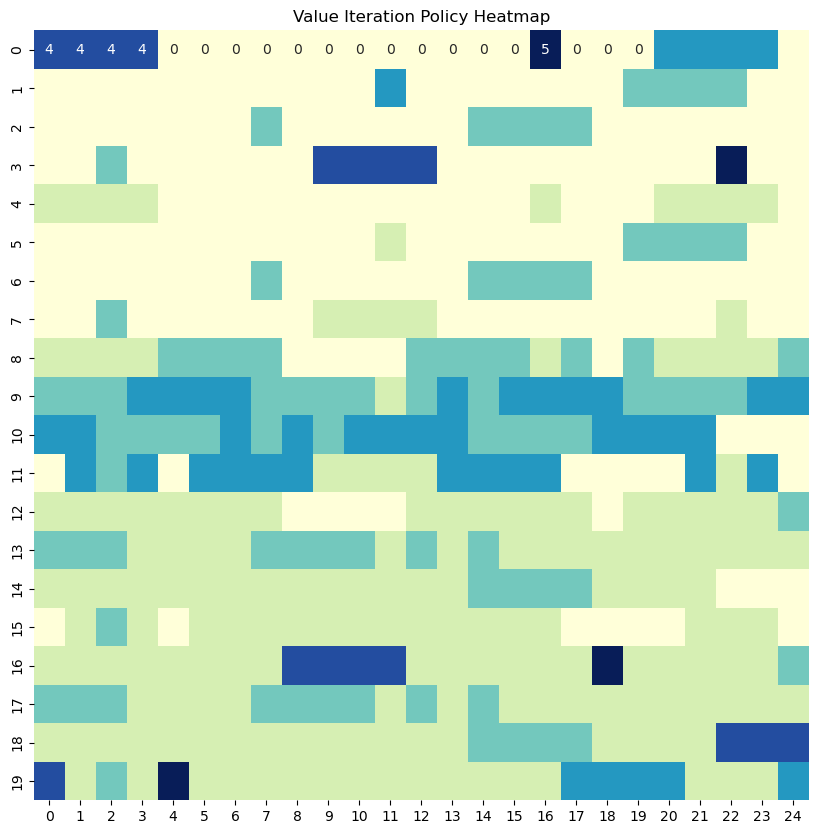

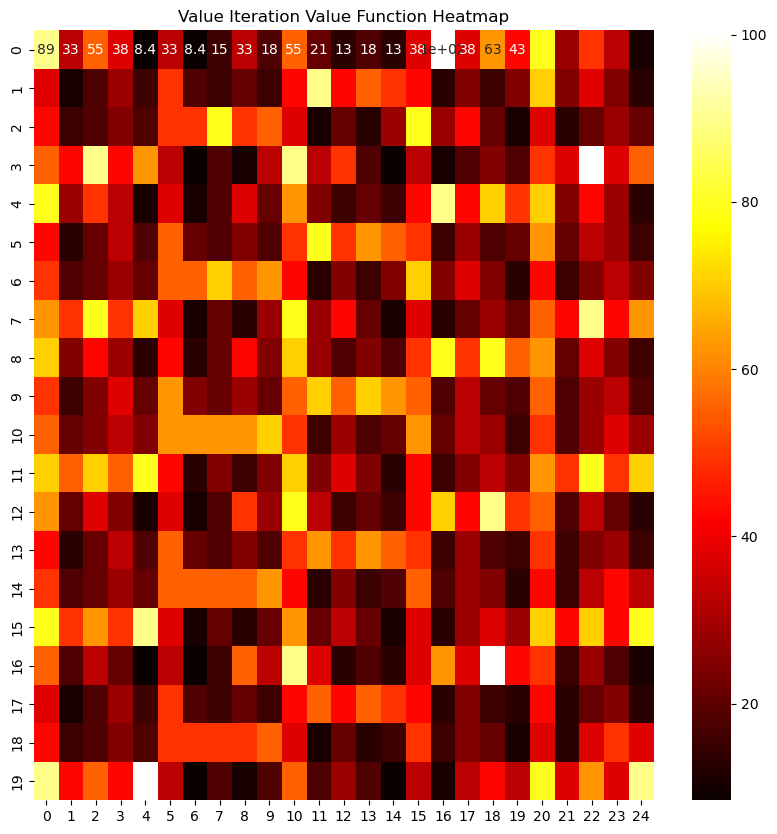

In [58]:
policy_vi, V_vi, delta_list_vi = value_iteration(env)

# Plotting the policy heatmap
plot_policy_heatmap(policy_vi, "Value Iteration Policy Heatmap")

# Plotting the value function heatmap
plot_value_function_heatmap(V_vi, "Value Iteration Value Function Heatmap")

Policy Iteration converged at iteration 26


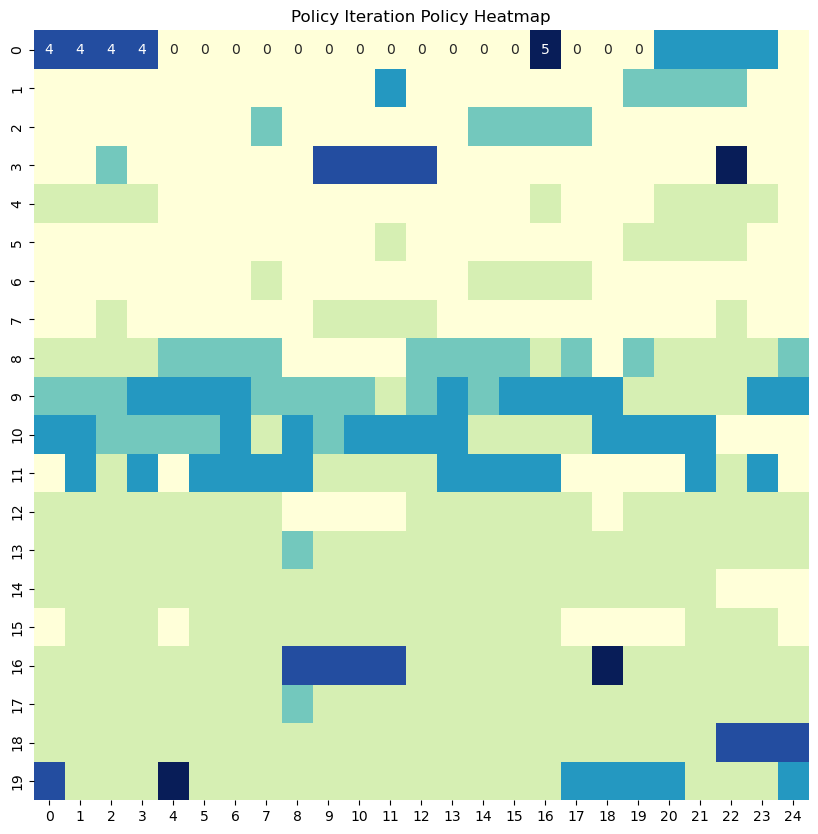

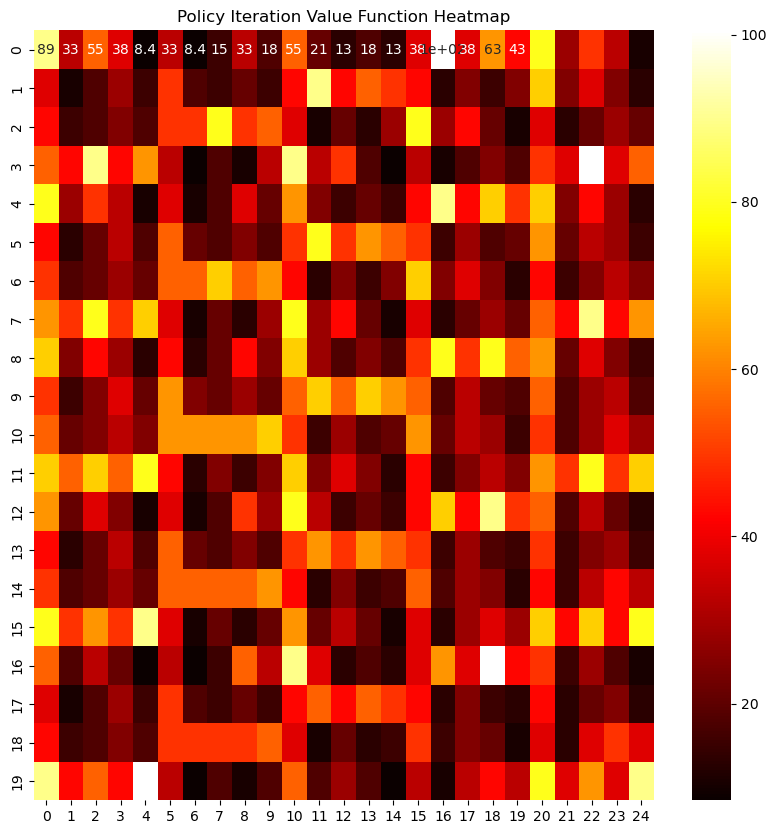

In [61]:
policy_pi, V_pi, iterations_pi = policy_iteration(env)

# Plotting the policy heatmap
plot_policy_heatmap(policy_pi, "Policy Iteration Policy Heatmap")

# Plotting the value function heatmap
plot_value_function_heatmap(V_pi, "Policy Iteration Value Function Heatmap")

In [90]:
def decode_taxi_state(state):
    # These constants are from the Taxi-v3 environment's implementation details
    nR, nC, nP, nD = 5, 5, 5, 4  # Number of rows, columns, passenger locations, and destinations
    max_row = nR - 1
    max_col = nC - 1
    max_pass_loc = nP - 1

    taxi_row = state // (nC * nP * nD)
    taxi_col = (state % (nC * nP * nD)) // (nP * nD)
    pass_loc = (state % (nP * nD)) // nD
    dest_idx = state % nD
    
    return taxi_row, taxi_col, pass_loc, dest_idx

# Example of decoding state 328
print(decode_taxi_state(328))

(3, 1, 2, 0)


In [91]:
def filter_policy_for_scenario(policy, passenger_location, destination, env):
    # Assuming there are 25 taxi positions, 5 passenger locations (including 'in taxi'), and 4 destinations
    filtered_policy = np.full((5, 5), np.nan)  # Initialize with NaNs to identify unused states
    
    # Loop over all states to filter the policy for the given scenario
    for state in range(len(policy)):
        taxi_row, taxi_col, pass_loc, dest_idx = decode_taxi_state(state)
        if pass_loc == passenger_location and dest_idx == destination:
            filtered_policy[taxi_row, taxi_col] = policy[state]
            
    return filtered_policy

In [86]:
def plot_value_function_heatmap(value_function, title, shape=(5, 5)):
    """
    Plots a heatmap for the given value function.
    :param value_function: A list or numpy array representing the value function.
    :param title: Title of the plot.
    :param shape: Shape to reshape the value function array into. This should match the layout of the environment.
    """
    plt.figure(figsize=(10, 10))
    sns.heatmap(value_function.reshape(shape), annot=True, cmap="hot", cbar=True)
    plt.title(title)
    plt.show()

def plot_policy_heatmap(policy_grid, title):
    """
    Plots a heatmap for the given policy grid.
    :param policy_grid: A 2D numpy array representing the policy grid.
    :param title: Title of the plot.
    """
    # Convert policy_grid to a numpy array in case it's not already one
    policy_grid = np.array(policy_grid)

    # Replace NaN values with a placeholder for no action (-1)
    policy_grid = np.nan_to_num(policy_grid, nan=-1).astype(int)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(policy_grid, annot=True, cmap="YlGnBu", cbar=False, square=True, fmt="d", ax=ax)
    
    # Update the color map for better visualization
    cmap = sns.color_palette("colorblind", as_cmap=True)
    sns.heatmap(policy_grid, annot=True, cmap=cmap, cbar=False, square=True, fmt="d", ax=ax)
    
    # Improve the visual output to display arrows or action names
    action_mapping = {0: '↓', 1: '↑', 2: '→', 3: '←', 4: 'P', 5: 'D', -1: ''}
    for text in ax.texts:
        action = int(text.get_text())
        text.set_text(action_mapping[action])
    
    plt.title(title)
    plt.show()

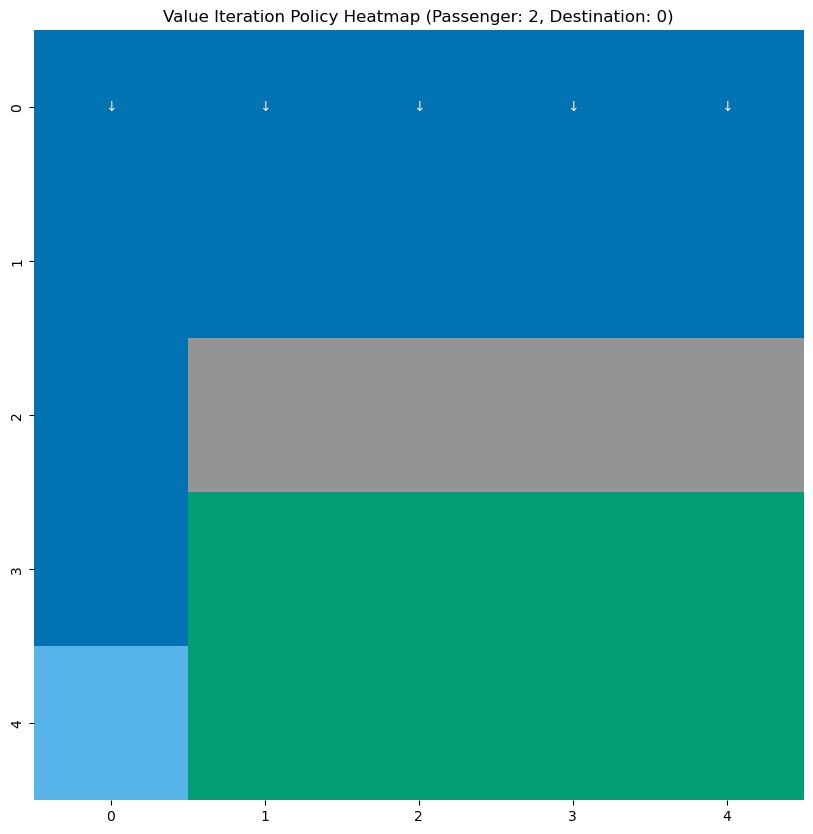

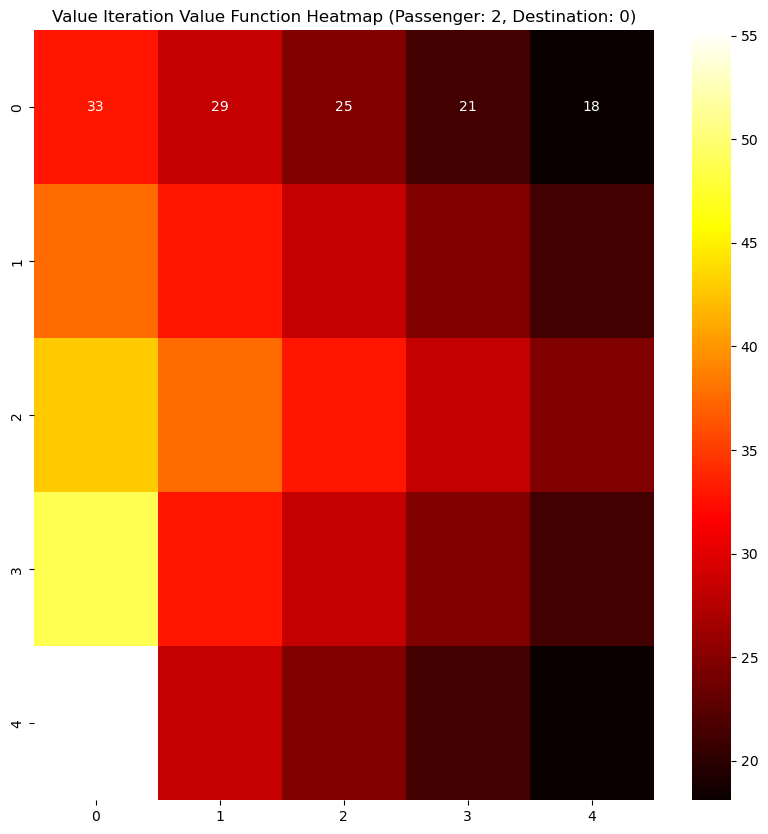

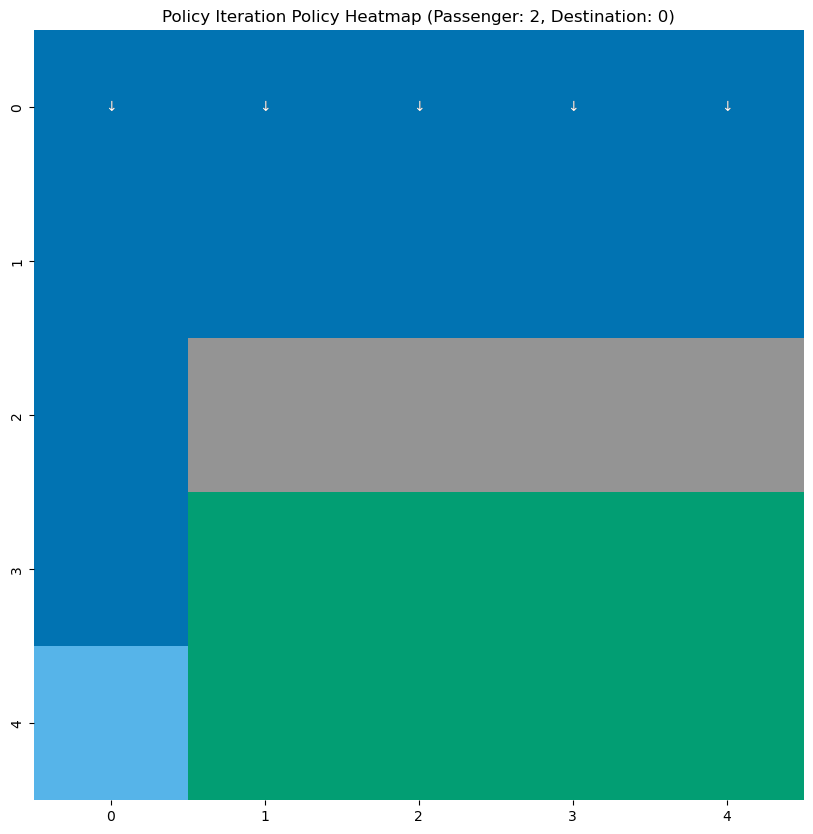

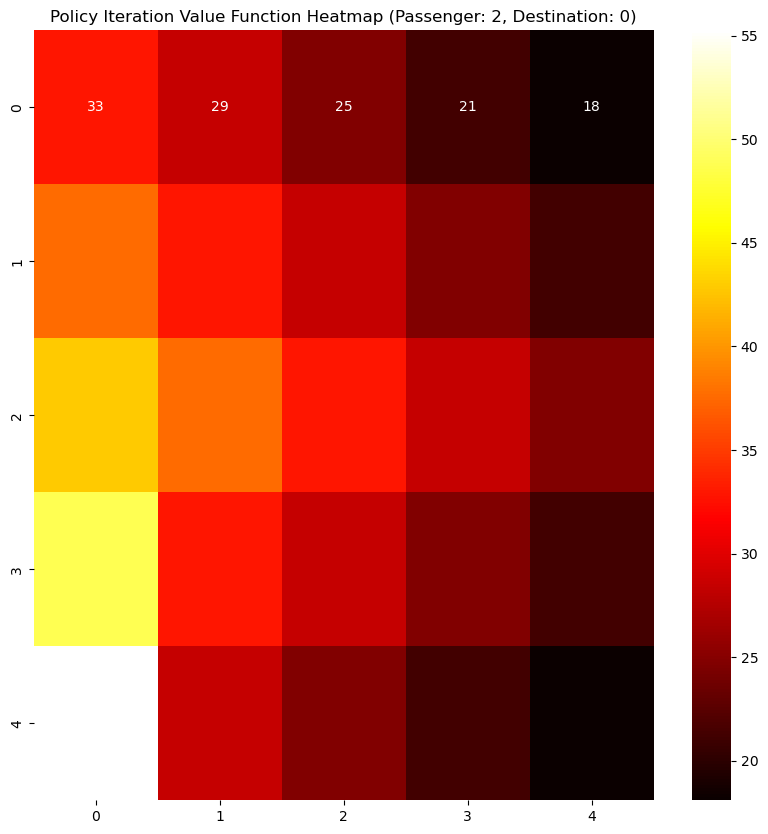

In [88]:
# Filter and plot heatmaps for Value Iteration
filtered_policy_vi = filter_policy_for_scenario(policy=policy_vi, passenger_location=2, destination=0, env=env)
plot_policy_heatmap(policy_grid=filtered_policy_vi, title="Value Iteration Policy Heatmap (Passenger: 2, Destination: 0)")

filtered_value_vi = filter_policy_for_scenario(policy=V_vi, passenger_location=2, destination=0, env=env)
plot_value_function_heatmap(value_function=filtered_value_vi, title="Value Iteration Value Function Heatmap (Passenger: 2, Destination: 0)")

# Filter and plot heatmaps for Policy Iteration
filtered_policy_pi = filter_policy_for_scenario(policy=policy_pi, passenger_location=2, destination=0, env=env)
plot_policy_heatmap(policy_grid=filtered_policy_pi, title="Policy Iteration Policy Heatmap (Passenger: 2, Destination: 0)")

filtered_value_pi = filter_policy_for_scenario(policy=V_pi, passenger_location=2, destination=0, env=env)
plot_value_function_heatmap(value_function=filtered_value_pi, title="Policy Iteration Value Function Heatmap (Passenger: 2, Destination: 0)")

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


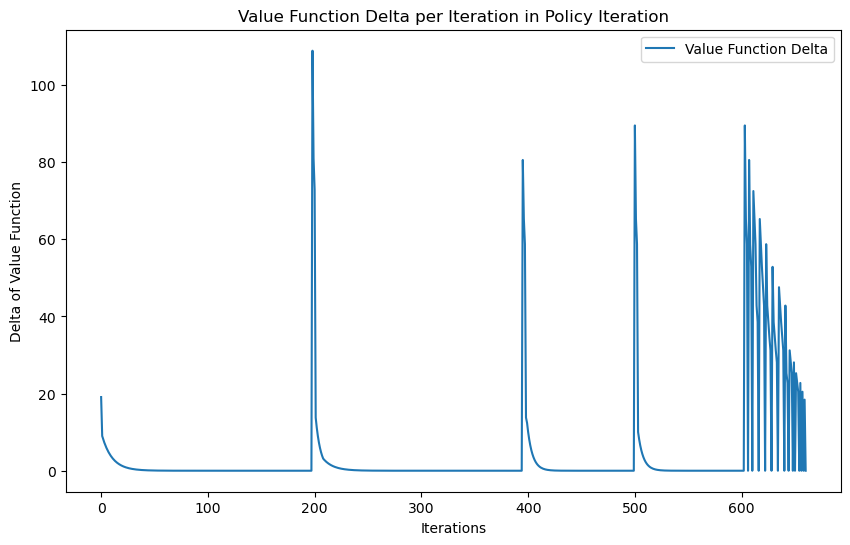

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

def policy_iteration(env, gamma=0.9, theta=1e-8):
    policy = np.random.choice(env.action_space.n, size=(env.observation_space.n)) 
    V = np.zeros(env.observation_space.n)
    policy_change_count = []  # List to track policy changes per iteration
    value_delta_list = []  # List to track value function changes

    iteration = 0
    while True:
        # Policy Evaluation
        while True:
            delta = 0
            for s in range(env.observation_space.n):
                v = V[s]
                V[s] = sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][policy[s]]])
                delta = max(delta, abs(v - V[s]))
            value_delta_list.append(delta)  # Track value function changes
            if delta < theta:
                break

        # Policy Improvement
        policy_stable = True
        for s in range(env.observation_space.n):
            old_action = policy[s]
            policy[s] = np.argmax([sum(p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a])
                                   for a in range(env.action_space.n)])
            if old_action != policy[s]:
                policy_stable = False

        policy_change_count.append(np.sum(policy != old_action))  # Track policy changes
        if policy_stable:
            break

        iteration += 1

    return policy, V, policy_change_count, value_delta_list

# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3")
env.reset()

# Run the modified Policy Iteration
policy_pi, V_pi, policy_change_count_pi, value_delta_list_pi = policy_iteration(env)

# Plotting the value delta for Policy Iteration
plt.figure(figsize=(10, 6))
plt.plot(value_delta_list_pi, label='Value Function Delta')
plt.xlabel('Iterations')
plt.ylabel('Delta of Value Function')
plt.title('Value Function Delta per Iteration in Policy Iteration')
plt.legend()
plt.show()

In [95]:
def value_iteration(env, gamma=0.9, theta=1e-8):
    V = np.zeros(env.observation_space.n)
    delta_list = []
    iteration = 0
    while True:
        delta = 0
        for s in range(env.observation_space.n):
            A = np.zeros(env.action_space.n)
            for a in range(env.action_space.n):
                for prob, next_state, reward, done in env.P[s][a]:
                    A[a] += prob * (reward + gamma * V[next_state])
            best_action_value = np.max(A)
            delta = max(delta, np.abs(best_action_value - V[s]))
            V[s] = best_action_value
        delta_list.append(delta)
        
        if delta < theta:
            break
        iteration += 1

    policy = np.zeros(env.observation_space.n, dtype=int)
    for s in range(env.observation_space.n):
        best_action = np.argmax([sum(prob * (reward + gamma * V[next_state])
                                    for prob, next_state, reward, done in env.P[s][a])
                                 for a in range(env.action_space.n)])
        policy[s] = best_action

    return policy, V, delta_list, iteration

In [96]:
def policy_iteration(env, gamma=0.9, theta=1e-8):
    policy = np.random.choice(env.action_space.n, size=(env.observation_space.n)) 
    V = np.zeros(env.observation_space.n)
    policy_change_count = []
    value_delta_list = []
    stable_policy_iteration = None
    iteration = 0
    
    while True:
        # Policy Evaluation
        while True:
            delta = 0
            for s in range(env.observation_space.n):
                v = V[s]
                V[s] = sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][policy[s]]])
                delta = max(delta, abs(v - V[s]))
            value_delta_list.append(delta)
            if delta < theta:
                break

        # Policy Improvement
        policy_stable = True
        change_count = 0
        for s in range(env.observation_space.n):
            old_action = policy[s]
            policy[s] = np.argmax([sum(p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a])
                                   for a in range(env.action_space.n)])
            if old_action != policy[s]:
                policy_stable = False
                change_count += 1
        policy_change_count.append(change_count)

        if policy_stable and stable_policy_iteration is None:
            stable_policy_iteration = iteration

        if policy_stable:
            break

        iteration += 1

    return policy, V, policy_change_count, value_delta_list, stable_policy_iteration

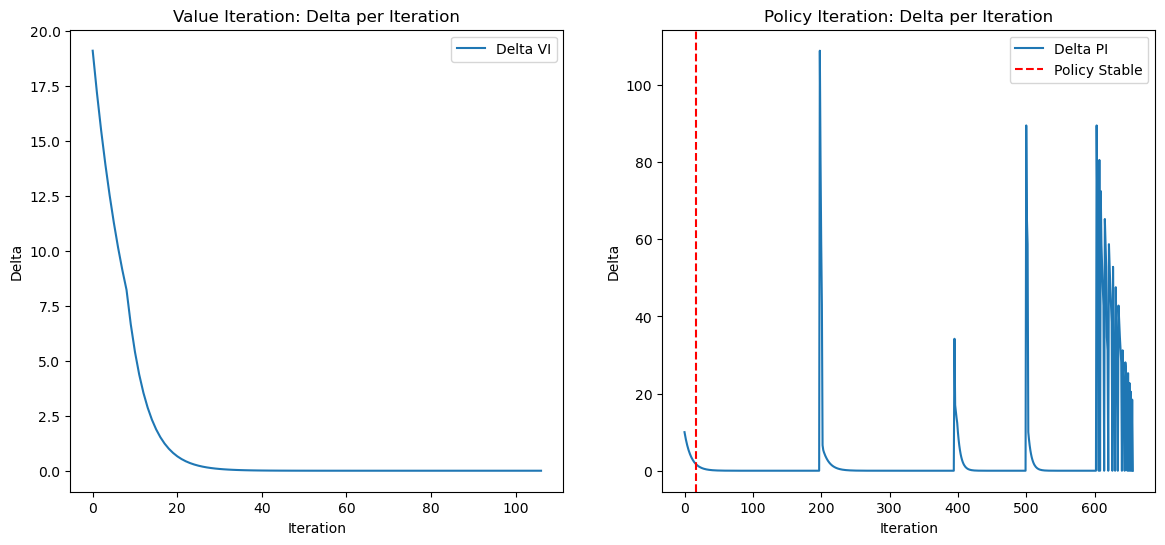

In [97]:
import time
import matplotlib.pyplot as plt

# Assuming you have already defined your environment 'env' and your VI and PI functions

# Run Value Iteration
start_time_vi = time.time()
policy_vi, V_vi, delta_list_vi, iterations_vi = value_iteration(env)
time_taken_vi = time.time() - start_time_vi

# Run Policy Iteration
start_time_pi = time.time()
policy_pi, V_pi, policy_change_count_pi, value_delta_list_pi, stable_policy_iteration_pi = policy_iteration(env)
time_taken_pi = time.time() - start_time_pi

# Plotting for VI
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(delta_list_vi, label='Delta VI')
plt.xlabel('Iteration')
plt.ylabel('Delta')
plt.title('Value Iteration: Delta per Iteration')
plt.legend()

# Plotting for PI
plt.subplot(1, 2, 2)
plt.plot(value_delta_list_pi, label='Delta PI')
plt.xlabel('Iteration')
plt.ylabel('Delta')
plt.title('Policy Iteration: Delta per Iteration')
plt.axvline(x=stable_policy_iteration_pi, color='r', linestyle='--', label='Policy Stable')
plt.legend()
plt.show()

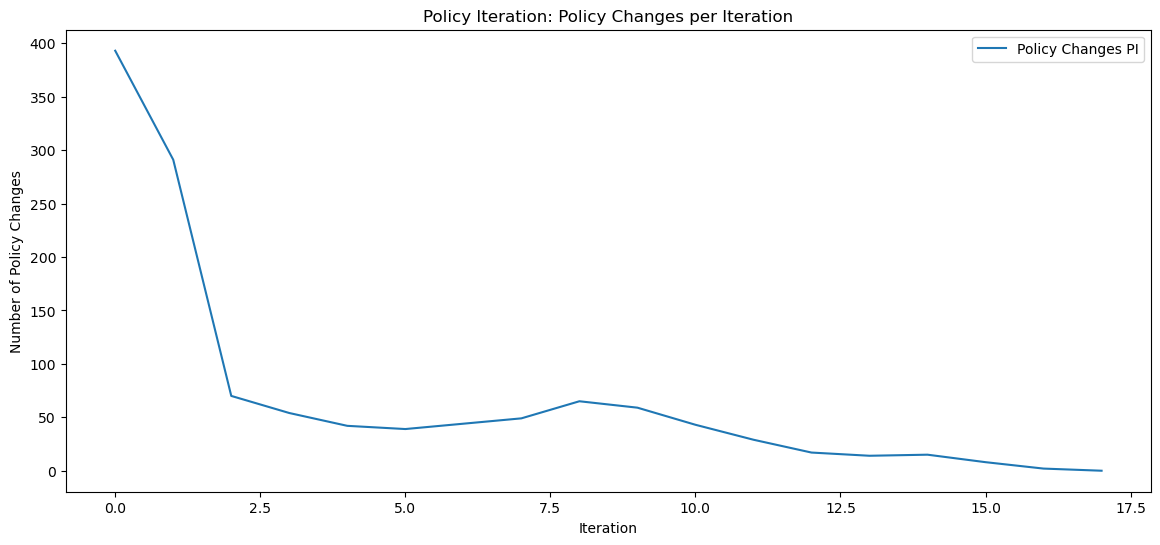

In [98]:
plt.figure(figsize=(14, 6))
plt.plot(policy_change_count_pi, label='Policy Changes PI')
plt.xlabel('Iteration')
plt.ylabel('Number of Policy Changes')
plt.title('Policy Iteration: Policy Changes per Iteration')
plt.legend()
plt.show()

In [107]:
def simulate_episodes(env, policy, num_episodes=100):
    success_count = 0
    total_rewards = 0
    total_steps = 0
    for _ in range(num_episodes):
        state_info = env.reset()
        state = state_info[0] if isinstance(state_info, tuple) else state_info  # Extract the state index
        done = False
        total_reward = 0
        steps = 0
        while not done:
            action = policy[state]
            step_result = env.step(action)

            # Unpack step_result based on its structure
            if isinstance(step_result, tuple):
                state_info = step_result[0]
                reward = step_result[1]
                done = step_result[2]
                # Extract only the state index
                state = state_info[0] if isinstance(state_info, tuple) else state_info
            else:
                raise ValueError("Unexpected return format from env.step()")
            
            total_reward += reward
            steps += 1
        
        total_rewards += total_reward
        total_steps += steps
        success_count += 1 if reward > 0 else 0  # Success if final reward is positive

    average_reward = total_rewards / num_episodes
    success_rate = success_count / num_episodes
    average_steps = total_steps / num_episodes
    return average_reward, success_rate, average_steps
# Simulate for VI
avg_reward_vi, success_rate_vi, avg_steps_vi = simulate_episodes(env, policy_vi)

# Simulate for PI
avg_reward_pi, success_rate_pi, avg_steps_pi = simulate_episodes(env, policy_pi)


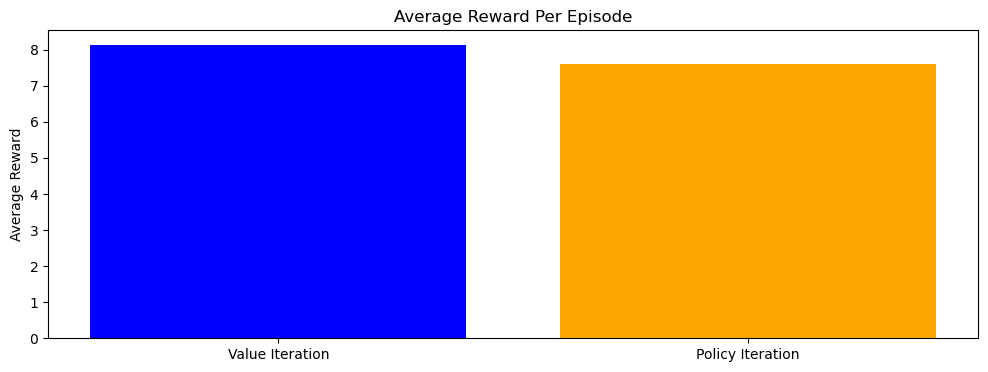

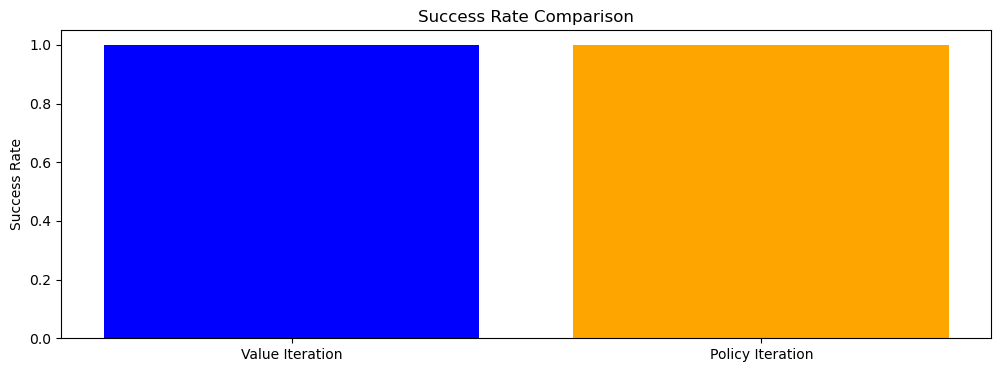

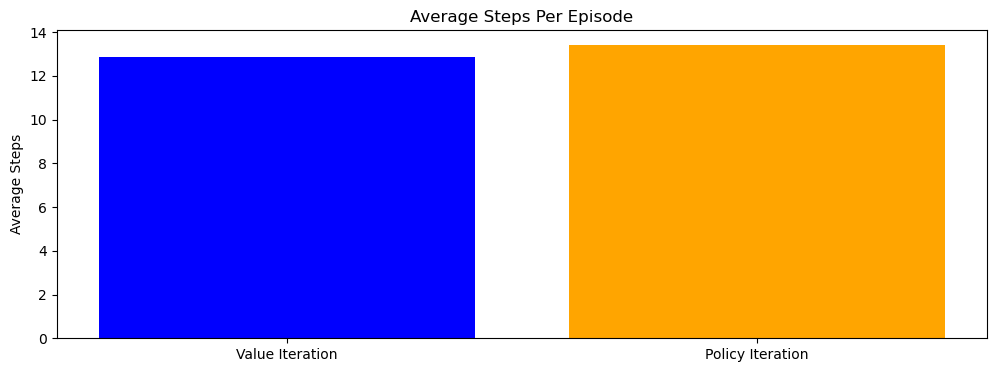

In [108]:
# Compare and plot the average rewards per episode
plt.figure(figsize=(12, 4))
plt.bar(['Value Iteration', 'Policy Iteration'], [avg_reward_vi, avg_reward_pi], color=['blue', 'orange'])
plt.title('Average Reward Per Episode')
plt.ylabel('Average Reward')
plt.show()

# Compare and plot the success rates
plt.figure(figsize=(12, 4))
plt.bar(['Value Iteration', 'Policy Iteration'], [success_rate_vi, success_rate_pi], color=['blue', 'orange'])
plt.title('Success Rate Comparison')
plt.ylabel('Success Rate')
plt.show()

# Compare and plot the average steps per episode
plt.figure(figsize=(12, 4))
plt.bar(['Value Iteration', 'Policy Iteration'], [avg_steps_vi, avg_steps_pi], color=['blue', 'orange'])
plt.title('Average Steps Per Episode')
plt.ylabel('Average Steps')
plt.show()

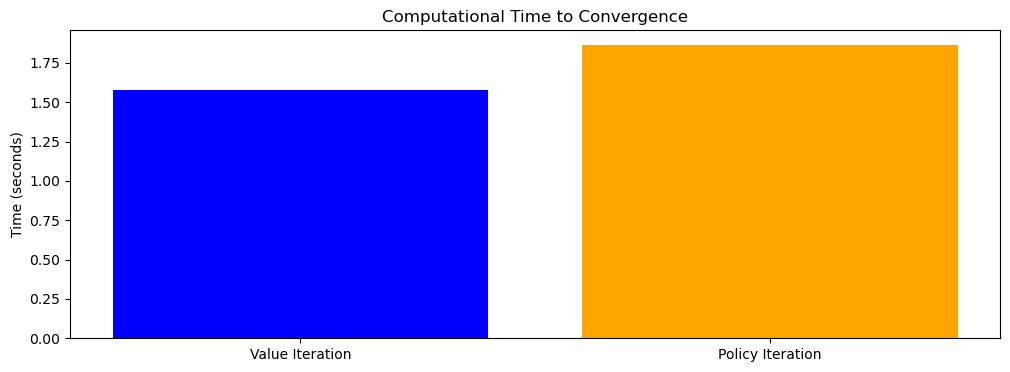

In [109]:
# Plot the computational time for VI and PI
plt.figure(figsize=(12, 4))
plt.bar(['Value Iteration', 'Policy Iteration'], [time_taken_vi, time_taken_pi], color=['blue', 'orange'])
plt.title('Computational Time to Convergence')
plt.ylabel('Time (seconds)')
plt.show()

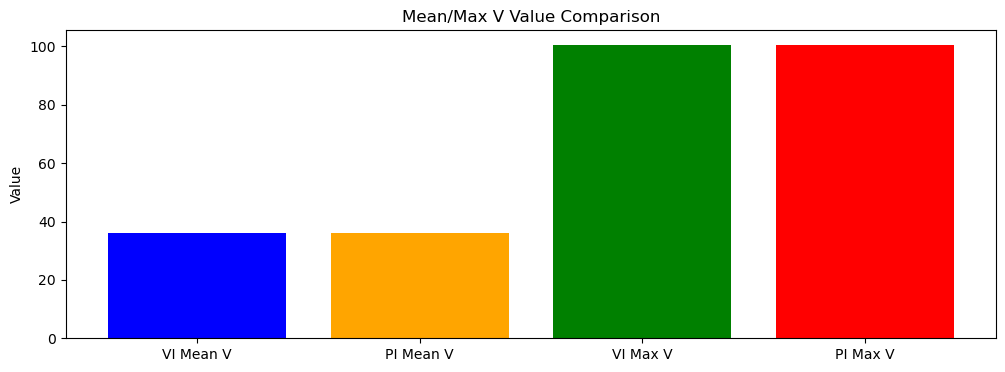

In [110]:
# Compute mean and max V values for VI and PI
mean_v_vi = np.mean(V_vi)
max_v_vi = np.max(V_vi)
mean_v_pi = np.mean(V_pi)
max_v_pi = np.max(V_pi)

# Plot the mean/max V values
plt.figure(figsize=(12, 4))
plt.bar(['VI Mean V', 'PI Mean V', 'VI Max V', 'PI Max V'], 
        [mean_v_vi, mean_v_pi, max_v_vi, max_v_pi], color=['blue', 'orange', 'green', 'red'])
plt.title('Mean/Max V Value Comparison')
plt.ylabel('Value')
plt.show()

In [111]:
gammas = [0.8, 0.9, 0.95, 0.99]
policies_vi = []
value_functions_vi = []
convergence_iterations_vi = []

policies_pi = []
value_functions_pi = []
convergence_iterations_pi = []

for gamma in gammas:
    policy_vi, V_vi, _, iterations_vi = value_iteration(env, gamma)
    policies_vi.append(policy_vi)
    value_functions_vi.append(V_vi)
    convergence_iterations_vi.append(iterations_vi)

    policy_pi, V_pi, _, _, iterations_pi = policy_iteration(env, gamma)
    policies_pi.append(policy_pi)
    value_functions_pi.append(V_pi)
    convergence_iterations_pi.append(iterations_pi)

# You can then plot how the policies, value functions, and number of iterations change with different gamma values

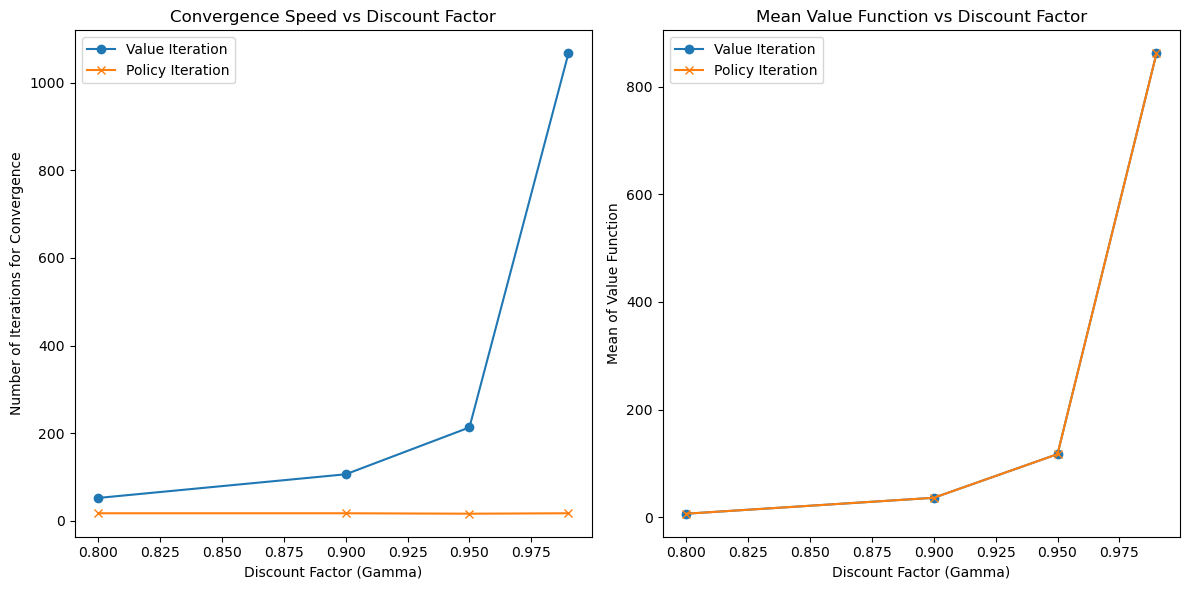

In [112]:
import matplotlib.pyplot as plt

# Assuming you have already run the VI and PI for different gamma values as described previously

# Plotting the number of iterations required for convergence for different gammas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(gammas, convergence_iterations_vi, label='Value Iteration', marker='o')
plt.plot(gammas, convergence_iterations_pi, label='Policy Iteration', marker='x')
plt.xlabel('Discount Factor (Gamma)')
plt.ylabel('Number of Iterations for Convergence')
plt.title('Convergence Speed vs Discount Factor')
plt.legend()

# Plotting the mean of the value functions for different gammas
mean_values_vi = [np.mean(V) for V in value_functions_vi]
mean_values_pi = [np.mean(V) for V in value_functions_pi]

plt.subplot(1, 2, 2)
plt.plot(gammas, mean_values_vi, label='Value Iteration', marker='o')
plt.plot(gammas, mean_values_pi, label='Policy Iteration', marker='x')
plt.xlabel('Discount Factor (Gamma)')
plt.ylabel('Mean of Value Function')
plt.title('Mean Value Function vs Discount Factor')
plt.legend()

plt.tight_layout()
plt.show()

State: 145, VI Action: 2, PI Action: 1
State: 146, VI Action: 2, PI Action: 1
State: 147, VI Action: 2, PI Action: 1
State: 157, VI Action: 2, PI Action: 1
State: 165, VI Action: 2, PI Action: 1
State: 166, VI Action: 2, PI Action: 1
State: 167, VI Action: 2, PI Action: 1
State: 177, VI Action: 2, PI Action: 1
State: 245, VI Action: 2, PI Action: 1
State: 246, VI Action: 2, PI Action: 1
State: 247, VI Action: 2, PI Action: 1
State: 257, VI Action: 2, PI Action: 1
State: 265, VI Action: 2, PI Action: 1
State: 266, VI Action: 2, PI Action: 1
State: 267, VI Action: 2, PI Action: 1
State: 277, VI Action: 2, PI Action: 1
State: 325, VI Action: 2, PI Action: 1
State: 326, VI Action: 2, PI Action: 1
State: 327, VI Action: 2, PI Action: 1
State: 333, VI Action: 2, PI Action: 1
State: 334, VI Action: 2, PI Action: 1
State: 335, VI Action: 2, PI Action: 1
State: 337, VI Action: 2, PI Action: 1
State: 339, VI Action: 2, PI Action: 1
State: 365, VI Action: 2, PI Action: 1
State: 366, VI Action: 2,

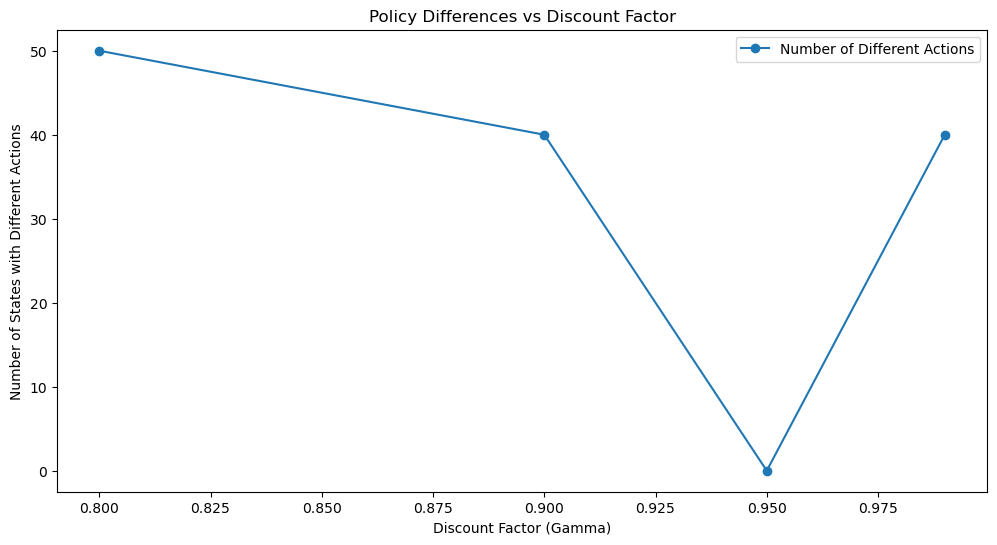

In [115]:
# Compare the optimal policies obtained from VI and PI for each state
different_actions = []
for state in range(env.observation_space.n):
    if policies_vi[-1][state] != policies_pi[-1][state]:  # Compare the last policy obtained (e.g., for gamma=0.99)
        different_actions.append((state, policies_vi[-1][state], policies_pi[-1][state]))

# If you want to print out the states where the policies differ
for state, action_vi, action_pi in different_actions:
    print(f"State: {state}, VI Action: {action_vi}, PI Action: {action_pi}")

# Optionally, you can plot the number of states where the policies differ for each gamma
num_differences_per_gamma = [sum(p_vi != p_pi for p_vi, p_pi in zip(policies_vi[i], policies_pi[i])) for i in range(len(gammas))]

plt.figure(figsize=(12, 6))
plt.plot(gammas, num_differences_per_gamma, label='Number of Different Actions', marker='o')
plt.xlabel('Discount Factor (Gamma)')
plt.ylabel('Number of States with Different Actions')
plt.title('Policy Differences vs Discount Factor')
plt.legend()
plt.show()

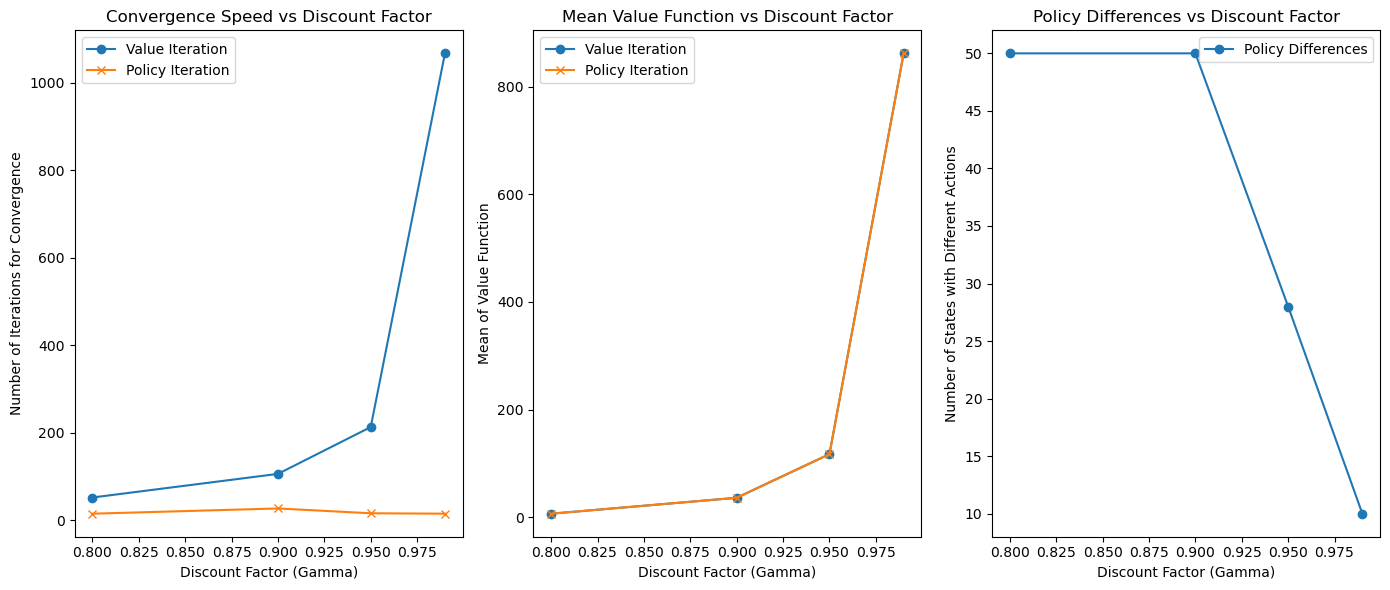

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
gammas = [0.8, 0.9, 0.95, 0.99]
num_states = env.observation_space.n
num_differences_per_gamma = []

# Results storage
policies_vi = []
value_functions_vi = []
convergence_iterations_vi = []

policies_pi = []
value_functions_pi = []
convergence_iterations_pi = []

# Run VI and PI for each gamma and store results
for gamma in gammas:
    policy_vi, V_vi, _, iterations_vi = value_iteration(env, gamma)
    policies_vi.append(policy_vi)
    value_functions_vi.append(V_vi)
    convergence_iterations_vi.append(iterations_vi)

    policy_pi, V_pi, _, _, iterations_pi = policy_iteration(env, gamma)
    policies_pi.append(policy_pi)
    value_functions_pi.append(V_pi)
    convergence_iterations_pi.append(iterations_pi)

    # Comparing policies for the current gamma value
    num_differences = sum(policy_vi[state] != policy_pi[state] for state in range(num_states))
    num_differences_per_gamma.append(num_differences)

# Plotting the number of iterations required for convergence for different gammas
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
plt.plot(gammas, convergence_iterations_vi, label='Value Iteration', marker='o')
plt.plot(gammas, convergence_iterations_pi, label='Policy Iteration', marker='x')
plt.xlabel('Discount Factor (Gamma)')
plt.ylabel('Number of Iterations for Convergence')
plt.title('Convergence Speed vs Discount Factor')
plt.legend()

# Plotting the mean of the value functions for different gammas
mean_values_vi = [np.mean(V) for V in value_functions_vi]
mean_values_pi = [np.mean(V) for V in value_functions_pi]

plt.subplot(1, 3, 2)
plt.plot(gammas, mean_values_vi, label='Value Iteration', marker='o')
plt.plot(gammas, mean_values_pi, label='Policy Iteration', marker='x')
plt.xlabel('Discount Factor (Gamma)')
plt.ylabel('Mean of Value Function')
plt.title('Mean Value Function vs Discount Factor')
plt.legend()

# Plotting the number of policy differences for different gammas
plt.subplot(1, 3, 3)
plt.plot(gammas, num_differences_per_gamma, label='Policy Differences', marker='o')
plt.xlabel('Discount Factor (Gamma)')
plt.ylabel('Number of States with Different Actions')
plt.title('Policy Differences vs Discount Factor')
plt.legend()

plt.tight_layout()
plt.show()

In [117]:
#Q-Learning

In [124]:
import gym
import numpy as np
import random

# Initialize environment
env = gym.make('Taxi-v3')

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.99  # Exploration decay rate
epsilon_min = 0.01  # Minimum exploration rate
theta = 0.0001  # Convergence threshold
num_episodes = 1000
max_steps_per_episode = 100

# Q-table
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [127]:
for episode in range(num_episodes):
    state_info = env.reset()
    state = state_info[0] if isinstance(state_info, tuple) else state_info  # Ensure state is an integer
    done = False
    total_reward = 0
    max_q_change = 0

    for step in range(max_steps_per_episode):
        # Exploration-exploitation trade-off
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q[state, :])  # Exploit

        # Take action and observe outcome
        result = env.step(action)
        new_state_info, reward, done, _, info = result
        new_state = new_state_info[0] if isinstance(new_state_info, tuple) else new_state_info

        # Update Q-table
        old_value = Q[state, action]
        next_max = np.max(Q[new_state, :])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        Q[state, action] = new_value

        # Track changes
        total_reward += reward
        q_change = abs(new_value - old_value)
        max_q_change = max(max_q_change, q_change)

        state = new_state  # Update state for the next iteration

        if done:
            break

    # Decay epsilon
    epsilon = max(epsilon * epsilon_decay, epsilon_min)
    
    # Record trackers
    rewards_all_episodes.append(total_reward)
    steps_all_episodes.append(step + 1)  # Adding 1 because 'step' starts from 0
    epsilon_values_over_time.append(epsilon)
    max_q_value_change_over_time.append(max_q_change)
    
    # Print episode summary every 100 episodes
    if episode % 100 == 0:
        print(f"Episode: {episode}, Reward: {total_reward}, Steps: {step}, Epsilon: {epsilon}")

    # Check for convergence
    if max_q_change < theta:
        print(f"Converged after {episode + 1} episodes")
        break

Episode: 0, Reward: -62, Steps: 73, Epsilon: 0.01
Episode: 100, Reward: -29, Steps: 49, Epsilon: 0.01
Episode: 200, Reward: 11, Steps: 9, Epsilon: 0.01
Episode: 300, Reward: 10, Steps: 10, Epsilon: 0.01
Episode: 400, Reward: 14, Steps: 6, Epsilon: 0.01
Episode: 500, Reward: -10, Steps: 21, Epsilon: 0.01
Episode: 600, Reward: 9, Steps: 11, Epsilon: 0.01
Episode: 700, Reward: -6, Steps: 26, Epsilon: 0.01
Episode: 800, Reward: 13, Steps: 7, Epsilon: 0.01
Episode: 900, Reward: 5, Steps: 15, Epsilon: 0.01


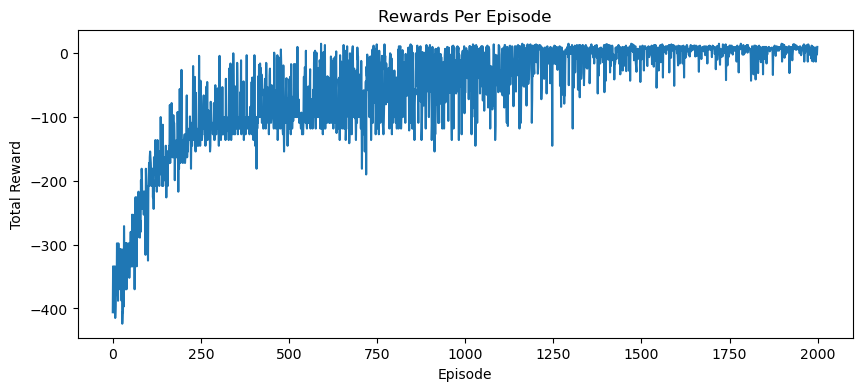

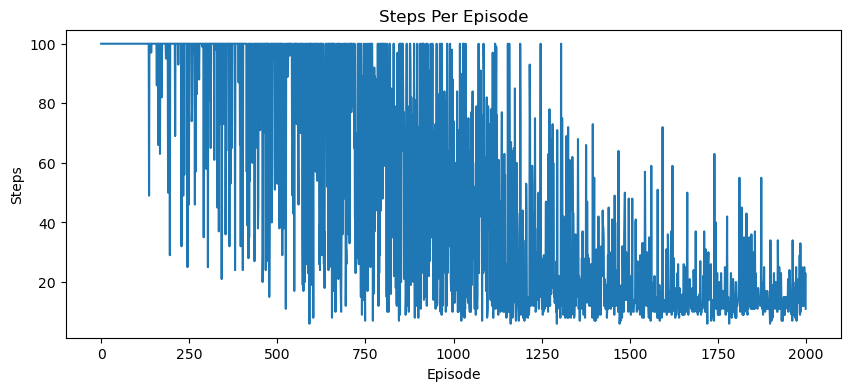

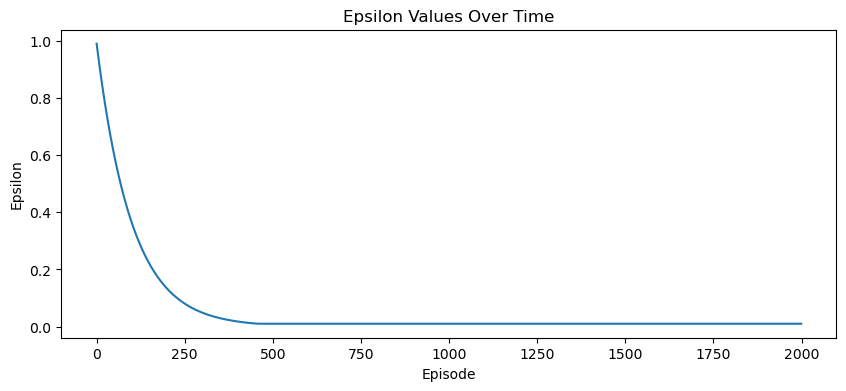

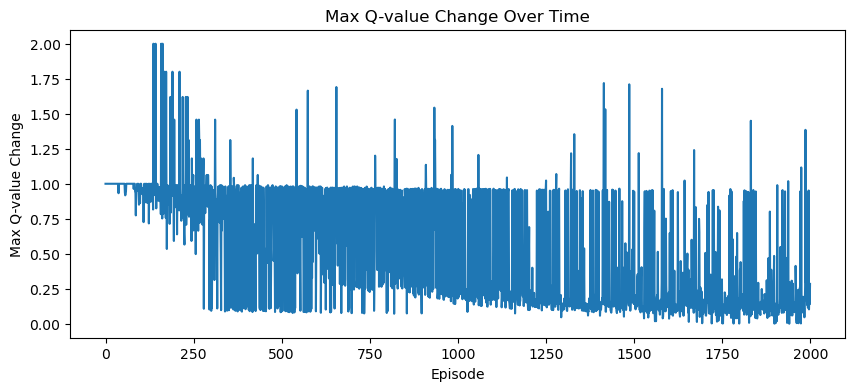

In [128]:
# Plotting total rewards per episode
plt.figure(figsize=(10, 4))
plt.plot(rewards_all_episodes)
plt.title('Rewards Per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

# Plotting steps per episode
plt.figure(figsize=(10, 4))
plt.plot(steps_all_episodes)
plt.title('Steps Per Episode')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.show()

# Plotting epsilon decay over time
plt.figure(figsize=(10, 4))
plt.plot(epsilon_values_over_time)
plt.title('Epsilon Values Over Time')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()

# Plotting Q-value change over time
plt.figure(figsize=(10, 4))
plt.plot(max_q_value_change_over_time)
plt.title('Max Q-value Change Over Time')
plt.xlabel('Episode')
plt.ylabel('Max Q-value Change')
plt.show()

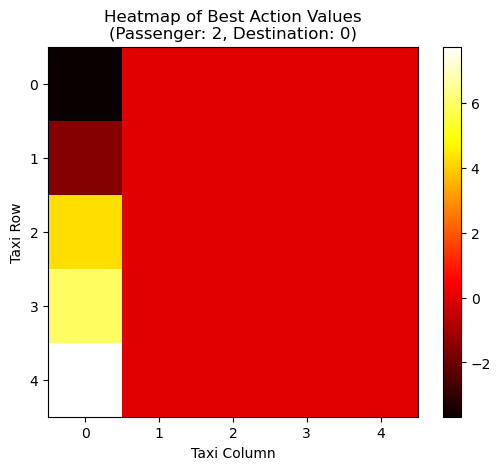

In [130]:
# Taxi environment constants
num_rows = 5
num_columns = 5
num_passenger_locations = 5  # (including the case when the passenger is in the taxi)
num_destinations = 4

# Decode the taxi's state to its components
def decode_taxi_state(encoded_state):
    # These constants are from the Taxi-v3 environment's implementation details
    taxi_row = encoded_state // (num_columns * num_passenger_locations * num_destinations)
    taxi_column = (encoded_state % (num_columns * num_passenger_locations * num_destinations)) // (num_passenger_locations * num_destinations)
    passenger_location = (encoded_state % (num_columns * num_passenger_locations * num_destinations)) // num_destinations
    destination = encoded_state % num_destinations
    return taxi_row, taxi_column, passenger_location, destination

# Visualize the Q-table for one passenger location and destination
def plot_taxi_q_table(Q, passenger_location, destination):
    # Initialize a value function grid for the given passenger location and destination
    value_function_grid = np.zeros((num_rows, num_columns))
    
    for state in range(env.observation_space.n):
        taxi_row, taxi_column, pass_loc, dest = decode_taxi_state(state)
        if pass_loc == passenger_location and dest == destination:
            value_function_grid[taxi_row, taxi_column] = np.max(Q[state, :])
    
    plt.imshow(value_function_grid, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(f'Heatmap of Best Action Values\n(Passenger: {passenger_location}, Destination: {destination})')
    plt.xlabel('Taxi Column')
    plt.ylabel('Taxi Row')
    plt.show()

# Example usage for passenger location 2 and destination 0
plot_taxi_q_table(Q, passenger_location=2, destination=0)

In [138]:
def extract_policy(Q_table):
    policy = np.argmax(Q_table, axis=1)
    return policy

In [139]:
def evaluate_policy(env, policy, num_episodes=10):
    total_rewards = 0
    for _ in range(num_episodes):
        state_info = env.reset()
        # Assuming the actual state is the first element of the tuple
        state = state_info[0] if isinstance(state_info, tuple) else state_info  
        done = False
        while not done:
            action = policy[state]
            result = env.step(action)
            # Assuming the new state is the first element of the result tuple
            new_state_info = result[0] if isinstance(result, tuple) else result
            new_state = new_state_info[0] if isinstance(new_state_info, tuple) else new_state_info
            reward = result[1]  # Assuming reward is the second element
            done = result[2]  # Assuming done is the third element
            total_rewards += reward
            state = new_state  # Update state
    average_reward = total_rewards / num_episodes
    return average_reward

# Extract and evaluate policy
policy = extract_policy(Q)
policy_performance = evaluate_policy(env, policy)
print(f"Average Reward with Extracted Policy: {policy_performance}")

KeyboardInterrupt: 